# Binary tree basics

In [1]:
import matplotlib.pyplot as plt
from dtreeviz.trees import *
from lolviz import *

import numpy as np
import pandas as pd

## Binary tree class definition

In [2]:
class TreeNode:
  def __init__(self, value, left=None, right=None):
    self.value = value
    self.left = left
    self.right = right
  def __repr__(self):
    return str(self.value)
  def __str__(self):
    return str(self.value)

## Manual tree construction

Hook nodes together.

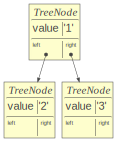

In [3]:
root = TreeNode(1)
root.left = TreeNode(2)
root.right = TreeNode(3)
treeviz(root)

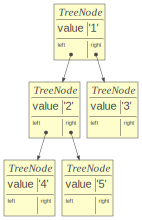

In [4]:
root.left.left = TreeNode(4)
root.left.right = TreeNode(5)
treeviz(root)

## Recursion detour

In [5]:
def fact(n):
    if n==0: return 1
    return n * fact(n-1)

In [6]:
fact(0), fact(1), fact(5), fact(8)

(1, 1, 120, 40320)

### Template for building recursive functions:

<i>
def f(input):<br>
&nbsp;&nbsp;  1. check termination condition<br>
&nbsp;&nbsp;  2. process the active input region, current node, etc...<br>
&nbsp;&nbsp;  3. invoke f on subregion(s), children, etc...<br>
&nbsp;&nbsp;  4. combine and return results
</i>    

## Recursive tree walk

Template for building recursive functions:

<i>
def f(input):<br>
&nbsp;&nbsp;  1. check termination condition<br>
&nbsp;&nbsp;  2. process current node<br>
&nbsp;&nbsp;  3. invoke f on left, right child<br>
</i>    

In [7]:
def walk_tree(p:TreeNode) -> None:
    if p is None: return
    print(p.value) # "visit" node in preorder traversal position
    walk_tree(p.left)
    walk_tree(p.right)

## Tree search

In [8]:
def search(p:TreeNode, x:object) -> TreeNode:
    if p is None: return None
    if x==p.value: return p
    q = search(p.left, x)
    if q is not None: return q
    return search(p.right, x)

In [9]:
search(root, 2), search(root, 1), search(root, 5)

(2, 1, 5)

## Binary search trees

Have condition that all elements less than p.value are accessed via p.left and greater than accessed via p.right

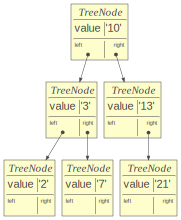

In [10]:
root = TreeNode(10)
root.left = TreeNode(3)
root.right = TreeNode(13)
root.left.left = TreeNode(2)
root.left.right = TreeNode(7)
root.right.right = TreeNode(21)
treeviz(root)

### Walking

In [11]:
def bst_search(p:TreeNode, x:object):
    if p is None: return None
    if x<p.value:
        return bst_search(p.left, x)
    if x>p.value:
        return bst_search(p.right, x)
    return p

In [12]:
bst_search(root, 10), bst_search(root, 3), bst_search(root, 2), bst_search(root, 21)

(10, 3, 2, 21)

### Constructing

In [13]:
def add(p:TreeNode, value) -> TreeNode:
    "add nodes like a binary search tree"
    if p is None:
        return TreeNode(value)
    if value < p.value:
        p.left = add(p.left, value)
    elif value > p.value:
        p.right = add(p.right, value)
    # do nothing if equal (already there)
    return p

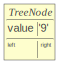

In [14]:
from lolviz import *
root = add(None, 9)
treeviz(root)

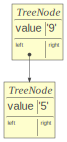

In [15]:
add(root, 5)
treeviz(root)

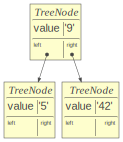

In [16]:
add(root, 42)
treeviz(root)

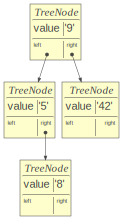

In [17]:
add(root, 8)
treeviz(root)

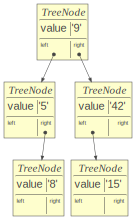

In [18]:
add(root, 15)
treeviz(root)

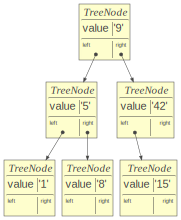

In [19]:
add(root, 1)
treeviz(root)

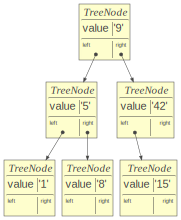

In [20]:
add(root, 5) # already there
treeviz(root)